# Exploratory Data Analysis (EDA) case study: Retail Store #


Let's start by replicating what we did in Lecture1 to read and clean the data:

In [1]:
import pandas as pd
df = pd.read_csv("Retail_Store.csv")
df.rename(columns={"Unnamed: 0": "Row_ID"}, inplace=True)
df.loc[df['Transaction_Type'].isna(), 'Transaction_Type'] = 'Cash'
df.drop_duplicates(inplace=True)
df.drop(['Row_ID','Branch_Name'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by=['Date'],inplace=True)
df.drop([20], axis=0, inplace=True) # drop record that is a duplicate with wrong Customer_ID

<ipython-input-1-6b0793b0a4c6>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


## What is EDA?

*“Exploratory data analysis” is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there.* — John Tukey

* John Tukey, a mathematician at Bell Labs, developed exploratory data analysis in contrast to confirmatory data analysis, which concerns itself with modeling and hypotheses.

> In EDA, there is no hypothesis and there is no model. The “exploratory” aspect means that your understanding of the problem you are solving, or might solve, is changing as you go.



* The basic tools of EDA are **plots**, **graphs** and **summary statistics**. 

* EDA is a method of systematically going through the data, ***plotting distributions*** of all variables (using box plots), plotting time series of data, transforming variables, ***looking at all pairwise relationships*** between variables using scatterplot matrices, and ***generating summary statistics*** for all of them. 

* At the very least that would mean computing their mean, minimum, maximum, the upper and lower quartiles, and identifying outliers.

> You want to **understand the data** — gain intuition, understand the shape of it, and try to connect your understanding of the process that generated the data to the data itself.

There are important reasons anyone working with data should do EDA:

* to gain intuition about the data; 

* to make comparisons between distributions; 

* for **sanity checking** (making sure the data is on the scale you expect, in the format you thought it should be); 

* to find out where data is **missing** or if there are **outliers**; 

* to **summarize** the data.

## Grouping ##

One thing that you often need to do is group all records that have the same value in a specific column:

In [2]:
# We create groups of records (rows) based on the value of 'Customer_ID'

customer_groups = df.groupby(['Customer_ID'])

#    In the following we show the groups: the dictionary contains 
#    the group name and the list of row indices beloging to it.
#    { group_name: [row_1, row_2, ...], ... } 

customer_groups.groups

{1: [7287, 7286], 2: [29174, 61446], 3: [158, 157, 156], 4: [111168, 111167, 111166, 111165, 68806], 5: [17914, 29093, 66664, 53729, 13261], 6: [31231, 31230, 31229], 7: [97643], 8: [61908], 9: [27483], 10: [14357], 11: [9300], 12: [1713], 13: [2931, 13935, 13936], 14: [5792, 16562, 16561, 16560, 18559, 18560, 18561, 26572], 15: [2365], 16: [5693, 37956], 17: [1185, 1184, 2610], 18: [6367], 19: [35893, 35892], 20: [15065, 17237, 21745, 2456], 21: [27414], 22: [4568], 23: [91866], 24: [6118, 14468, 14466, 14467], 25: [7180, 18881, 18880], 26: [4816, 4815, 4813, 4812, 4814, 31761, 11705, 11706, 11707, 11704, 22390, 22391], 27: [82743, 82742], 28: [7576, 7577], 29: [33824], 30: [17513, 17512, 17510, 17511, 17509, 37601, 37602, 37603], 31: [27929, 27928], 32: [30665, 40038], 33: [30296, 30295, 30293, 30292, 30294, 12900], 34: [28419], 35: [7947], 36: [36082, 36083, 36084, 36086, 36085], 37: [10224], 38: [65775, 65769], 39: [2005], 40: [11379, 11378, 11377, 11376, 11375, 11374, 11373, 11372

In [3]:
# select a specific customer
customer_groups.get_group(17470)

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
96781  2016-02-10        17470           47656          O38  FASUK       1.0   
96780  2016-02-10        17470           47656          T80  FVB1M       1.0   
25354  2016-03-15        17470           12293          R6E  DUV2Y       1.0   
25353  2016-03-15        17470           12293          P42  YJ0Q7       1.0   
29732  2016-03-25        17470           14479          N8U  COWU2       1.0   
...           ...          ...             ...          ...    ...       ...   
46670  2016-12-05        17470           23116          A38  TGDAD       2.0   
125142 2016-12-14        17470           61414          A38  TGDAD       2.0   
130623 2016-12-28        17470           64102          8HU  I44Y5       2.0   
130622 2016-12-28        17470           64102          8HU  1LEE7       1.0   
130621 2016-12-28        17470           64102          J4R  A9P11       1.0   

        Sales_Amount  Hour Transaction_Type  
96781           2.55    12             Card  
96780           4.30    12             Card  
25354           8.00    11             Card  
25353           8.32    11             Card  
29732           3.82    14             Card  
...              ...   ...              ...  
46670          48.27    18             Card  
125142         42.16    16             Card  
130623         10.10    16             Cash  
130622          2.96    16             Cash  
130621          6.92    16             Cash  

[61 rows x 9 columns]

In [4]:
# get the total number of items bought by each customer
customer_groups['Quantity'].sum()

Customer_ID
1         2.0
2         2.0
3         4.0
4         5.0
5        14.0
         ... 
22621     3.0
22622     1.0
22623     3.0
22624     2.0
22625    10.0
Name: Quantity, Length: 22625, dtype: float64

In [5]:
# find the customer that bought the most (in total) and how many items they bought
c_id = (customer_groups['Quantity'].sum()).idxmax()
tot_bought = customer_groups.get_group(c_id)['Quantity'].sum()
print(f'customer: {c_id}, number bought: {tot_bought}')

customer: 17471, number bought: 814.9


## Basic statistics ##

### **Transaction Types**

* **Q1:** Which is the payment method preferred by our customers?

* **Q2:** How do we retrieve this information from our dataframe?

In [6]:
t_types = df['Transaction_Type'].value_counts()

# ** NOTE **
# 
# value_counts()
#
#     Return a Series containing counts of unique values.
#
# ** NOTE **

t_types

Card    84905
Cash    46801
Name: Transaction_Type, dtype: int64

* **Q1:** How do we visualize this information?

<ipython-input-7-5a834defdb88>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


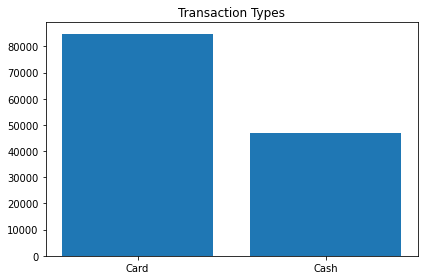

In [7]:
# We plot the result

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.bar(x=t_types.index.tolist(), height=t_types.tolist())
ax.set_title("Transaction Types") # Add a title to the axes.

fig.tight_layout()
fig.show()

* **Q1:** Is the chart informative? 

* **Q2:** Can we do better?

<ipython-input-8-261222b1f1d0>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[64.46555206292803, 35.53444793707196]


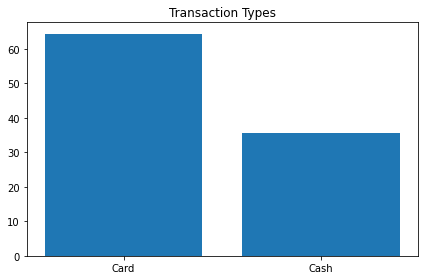

In [8]:
fig, ax = plt.subplots()

tot_types = sum(t_types.tolist())
percentage = [ (v/tot_types)*100 for v in t_types.tolist()]
print(percentage)

bars = ax.bar(t_types.index.tolist(), percentage)

ax.set_title("Transaction Types") # Add a title to the axes.

fig.tight_layout()
fig.show()

* **Q1:** Did we do the right thing?

* **Q2:** Do we need to group data somehow before counting?


In [9]:
#
# Group by "Transaction_ID"
#

t_types = df.groupby(["Transaction_ID"]).agg({'Transaction_Type':'first'})['Transaction_Type'].value_counts()


[64.68105500757552, 35.31894499242448]


<ipython-input-10-1f003e8e5ce4>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


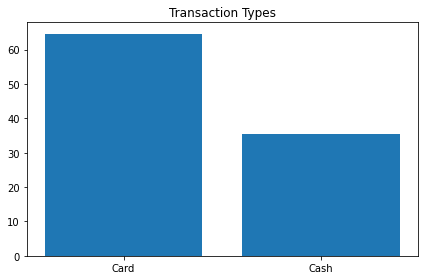

In [10]:
fig, ax = plt.subplots()

tot_types = sum(t_types.tolist())
percentage = [ (v/tot_types)*100 for v in t_types.tolist()]
print(percentage)

ax.bar(x=t_types.index.tolist(), height=percentage)
ax.set_title("Transaction Types") # Add a title to the axes.
fig.tight_layout()
fig.show()

#### To get the right result we must group data by Transaction_ID

Values are very close 

* Without **groupby** 
    * [64.46555206292803, 35.53444793707196]

* With **groupby**
    * [64.68105500757552, 35.31894499242448]



### **Sales Data**

* **Q1:** What is the distribution of sales over time?

* **Q2:** Which is the most profitable month of the year?

* **Q3:** Which is the day of the week preferred by our customers?

* **Q4:** Which is the quarter with the higest volume of sales?

* **Q5:** How do we analyse sales amounts by quarter, month, week, and day?

In [11]:
# We create a new dataframe containing individual breakdowns 
# of time period and sales amount

sales_time = df.sort_values('Date').copy().reset_index()
sales_time.drop(columns=["index"], inplace=True)

# The quarter of the date.
sales_time['Quarter']= sales_time['Date'].dt.quarter

# The month as January=1, December=12.
sales_time['Month']= sales_time['Date'].dt.month

# The week number.
sales_time['Week']= sales_time['Date'].dt.isocalendar().week

# The day of the week with Monday=0, Sunday=6.
sales_time['Day of Week']= sales_time['Date'].dt.dayofweek 

sales_time.head()

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
0 2016-01-02         7624            4850          BZU  AB7EN       1.0   
1 2016-01-02         4572            4996          FU5  SJ0ZD       2.0   
2 2016-01-02         4572            4996          N8U  COWU2       1.0   
3 2016-01-02         4572            4996          IEV  DL5MU       2.0   
4 2016-01-02         4225            4997          MU3  FBID9       1.0   

   Sales_Amount  Hour Transaction_Type  Quarter  Month  Week  Day of Week  
0          3.63    10             Card        1      1    53            5  
1          2.47    19             Card        1      1    53            5  
2          3.82    19             Card        1      1    53            5  
3         11.00    19             Card        1      1    53            5  
4          4.38    11             Card        1      1    53            5

* **Q1:** Do you notice anything strange in the dataframe?

* **Q2:** Why are the first days of the year assigned to week 53?

In [12]:
# The first week of year 2016 starts on the 4th of January
#
# The first days of year 2016 are part of the last week of year 2015

ts = pd.Timestamp(2016, 1, 3)
print(ts.week)

ts = pd.Timestamp(2016, 1, 4)
print(ts.week)

53
1


* **Q1:** Can our observation lead to any problem during the analysis?

* **Q2:** Do we need to modify the 'Week' column? For which rows? How?


In [13]:
# We set to Week=0 the first 3 days of the year

sales_time['Week'].loc[ sales_time['Date'] <= pd.Timestamp(2016, 1, 3) ] = 0
sales_time

Date  Customer_ID  Transaction_ID SKU_Category    SKU  Quantity  \
0      2016-01-02         7624            4850          BZU  AB7EN       1.0   
1      2016-01-02         4572            4996          FU5  SJ0ZD       2.0   
2      2016-01-02         4572            4996          N8U  COWU2       1.0   
3      2016-01-02         4572            4996          IEV  DL5MU       2.0   
4      2016-01-02         4225            4997          MU3  FBID9       1.0   
...           ...          ...             ...          ...    ...       ...   
131701 2016-12-31         1666           64680          B93  DNCR5       1.0   
131702 2016-12-31        17061           64635          B93  P1T5K       1.0   
131703 2016-12-31         9348           64675          PA3  E2REV       1.0   
131704 2016-12-31        22058           64676          2ML  7QUXS       1.0   
131705 2016-12-31        20543           64682          XG4  V0O35       1.0   

        Sales_Amount  Hour Transaction_Type  Quarter  Month  Week  Day of Week  
0               3.63    10             Card        1      1     0            5  
1               2.47    19             Card        1      1     0            5  
2               3.82    19             Card        1      1     0            5  
3              11.00    19             Card        1      1     0            5  
4               4.38    11             Card        1      1     0            5  
...              ...   ...              ...      ...    ...   ...          ...  
131701          6.80    15             Card        4     12    52            5  
131702         16.02     9             Card        4     12    52            5  
131703         32.19    16             Cash        4     12    52            5  
131704          3.13    14             Card        4     12    52            5  
131705          5.19    16             Card        4     12    52            5  

[131706 rows x 13 columns]

* **Q1:** How do we get a summary of our data?

In [14]:
# get a detailed summary of this data

sales_time.describe()

# ** NOTE **
#
# DataFrame.describe()
#
#   For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 
#   50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. 
#   The 50 percentile is the same as the median.
#
#   For mixed data types provided via a DataFrame, the default is to return only an analysis 
#   of numeric columns.
#
# ** NOTE **

Customer_ID  Transaction_ID       Quantity   Sales_Amount  \
count  131706.000000   131706.000000  131706.000000  131706.000000   
mean    12386.450367    32389.604187       1.485311      11.981524   
std      6086.447552    18709.901238       3.872667      19.359699   
min         1.000000        1.000000       0.010000       0.020000   
25%      7349.000000    16134.000000       1.000000       4.230000   
50%     13496.000000    32620.000000       1.000000       6.920000   
75%     17306.000000    48548.000000       1.000000      12.330000   
max     22625.000000    64682.000000     400.000000     707.730000   

                Hour        Quarter          Month       Week    Day of Week  
count  131706.000000  131706.000000  131706.000000   131706.0  131706.000000  
mean       14.231090       2.544744       6.654587  26.841275       2.769342  
std         3.257412       1.112805       3.450619   15.07724       1.893156  
min         8.000000       1.000000       1.000000        0.0       0.000000  
25%        11.000000       2.000000       4.000000       14.0       1.000000  
50%        15.000000       3.000000       7.000000       27.0       3.000000  
75%        17.000000       4.000000      10.000000       40.0       4.000000  
max        20.000000       4.000000      12.000000       52.0       6.000000

**count**: count number of non-NA/null observations. All columns have 131706 rows, so there are no missing fields.

For each column, we get a summary of how the data are distributed: **mean**, **std** (standard deviation), **min**, **max**, **quartiles** and **median** (the 50 percentile).

* **Q1:** What do we observe?

* **Q2:** Is the summary meaningfull for all columns of our dataframe?

* **Q3:** Should we group rows somehow?

In [15]:
# We group sales by transaction

sales_time.groupby('Transaction_ID').agg({'Sales_Amount':'sum', 'Quantity': 'sum', 'Hour': 'max'}).describe()

Sales_Amount      Quantity          Hour
count  64682.000000  64682.000000  64682.000000
mean      24.396874      3.024403     14.217495
std       38.613117      6.298796      3.261210
min        0.030000      0.100000      8.000000
25%        6.360000      1.000000     11.000000
50%       12.210000      2.000000     15.000000
75%       25.180000      3.000000     17.000000
max      707.730000    408.000000     20.000000

In [16]:
# ** NOTE **
#
# For object data (e.g. strings or timestamps), the result’s index will include count, unique, 
# top, and freq. The top is the most common value. The freq is the most common value’s frequency. 
# Timestamps also include the first and last items.
#
# ** NOTE **

sales_time[['SKU','SKU_Category','Transaction_Type']].describe()

SKU SKU_Category Transaction_Type
count   131706       131706           131706
unique    5242          187                2
top      UNJKW          N8U             Card
freq      2007        10913            84905

* The **top** is the most common value. 

* The **freq** is the most common value’s frequency.

### **Plotting Sales Data**

* **Q1:** How do we visualize information about sales amounts?

In [17]:
# We create a group for each plot: Quarter, Month, Week, and Day

sales_by_quarter = sales_time.groupby(['Quarter'], as_index=False).agg({'Sales_Amount':'sum'})

sales_by_month = sales_time.groupby(['Month'], as_index=False).agg({'Sales_Amount':'sum'})

sales_by_week = sales_time.groupby(['Week'], as_index=False).agg({'Sales_Amount':'sum'})

sales_by_weekday = sales_time.groupby(['Day of Week'], as_index=False).agg({'Sales_Amount':'sum'})

# ** NOTE **
#
# as_index=False
#
#     The groupby operation will not use the group as index for the new dataframe.
#
#     Below there are two example to clarify the difference.    
#
# ** NOTE **

In [18]:
sales_by_week.head(10)

Week  Sales_Amount
0     0       8777.88
1     1      25959.86
2     2      28908.07
3     3      27594.49
4     4      26043.81
5     5      28033.96
6     6      26660.74
7     7      27448.34
8     8      31070.88
9     9      28088.95

* **Q1:** How does the as_index parameter work?



In [19]:
#
# as_index = True
#
sales_time.groupby(['Quarter']).agg({'Sales_Amount':'sum'})

Sales_Amount
Quarter              
1           360515.05
2           401445.97
3           400525.88
4           415551.72

In [20]:
#
# as_index = False
#
sales_by_quarter

Quarter  Sales_Amount
0        1     360515.05
1        2     401445.97
2        3     400525.88
3        4     415551.72


* **Q1:** Do we need to group sales by transaction? Why?

<ipython-input-21-85f3cec84edd>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


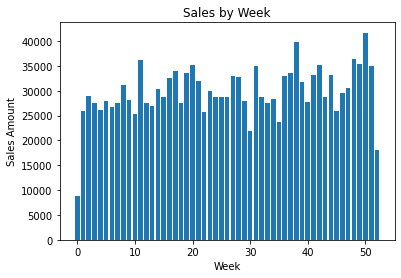

In [21]:

fig, ax = plt.subplots()

ax.bar(x=sales_by_week['Week'], height=sales_by_week['Sales_Amount'])

ax.set_xlabel('Week') # Add an x-label to the axes.
ax.set_ylabel('Sales Amount') # Add a y-label to the axes.
ax.set_title("Sales by Week") # Add a title to the axes.

fig.show()

<ipython-input-22-5acd4615ee66>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  sales_fig.show()


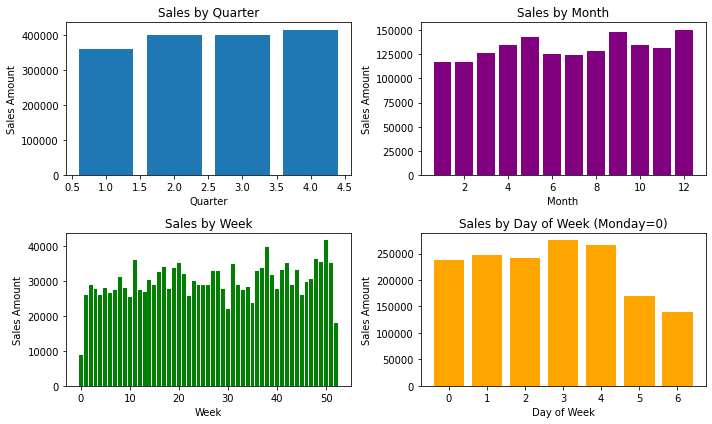

In [22]:
sales_fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axs[0,0].bar(x=sales_by_quarter['Quarter'], height=sales_by_quarter['Sales_Amount'])
axs[0,0].set_xlabel('Quarter') 
axs[0,0].set_ylabel('Sales Amount') 
axs[0,0].set_title("Sales by Quarter") 

axs[0,1].bar(x=sales_by_month['Month'], height=sales_by_month['Sales_Amount'], color='purple')
axs[0,1].set_xlabel('Month')
axs[0,1].set_ylabel('Sales Amount')
axs[0,1].set_title("Sales by Month")

axs[1,0].bar(x=sales_by_week['Week'], height=sales_by_week['Sales_Amount'], color='green')
axs[1,0].set_xlabel('Week') 
axs[1,0].set_ylabel('Sales Amount') 
axs[1,0].set_title("Sales by Week")

axs[1,1].bar(x=sales_by_weekday['Day of Week'], height=sales_by_weekday['Sales_Amount'], color='orange')
axs[1,1].set_xlabel('Day of Week')
axs[1,1].set_ylabel('Sales Amount')
axs[1,1].set_title("Sales by Day of Week (Monday=0)")

sales_fig.tight_layout()
sales_fig.show()

### The charts give us a quick idea of the spread of sales

* Sundays and Saturdays are typically low earning days, wherese Thursday seems the most profitable day of the week.

* September and December are the months with the higest amount of sales.

* Q1 is the less profitable quarter, wherese Q4 is the quarter with the higest amount of sales.


### **Exercise**

#### **Q1:** Which are the weeks with the highest volume of sales (top 5 weeks)? 

#### **Q2:** Why are those the weeks with the highest volume of sales?

In [23]:
sales_by_week.head()

Week  Sales_Amount
0     0       8777.88
1     1      25959.86
2     2      28908.07
3     3      27594.49
4     4      26043.81

In [24]:
sales_by_week.sort_values(by='Sales_Amount', ascending=False).iloc[:5]

Week  Sales_Amount
50    50      41687.98
38    38      39729.01
48    48      36312.43
11    11      36156.74
49    49      35462.61

In [25]:
sales_by_week.iloc[sales_by_week['Sales_Amount'].argmax()]

Week                50.0
Sales_Amount    41687.98
Name: 50, dtype: Float64

### **Transactions by hour**

**Q1:** When do customers visit the store during the day?

**Q2:** Which are the rushing hours?

**Q3:** Which are the hours with the lowest number of customers?

In [26]:
#
# We group rows by Transaction_ID 
#

trs = df.groupby('Transaction_ID', as_index=False).agg({'Hour':'first'})

trs_hour = trs.groupby('Hour', as_index=False).agg({'Transaction_ID':'size'})

trs_hour.head(3)


Hour  Transaction_ID
0     8            2386
1     9            3537
2    10            4625

<ipython-input-27-f52d53ac6258>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


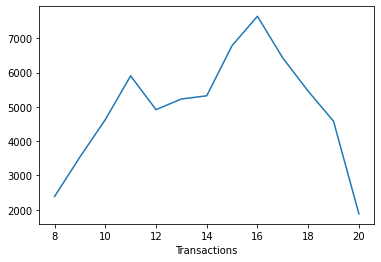

In [27]:
fig, ax = plt.subplots()

ax.plot(trs_hour['Hour'], trs_hour['Transaction_ID'])
ax.set_xlabel('Working Hours')
ax.set_xlabel('Transactions')

fig.show()

* The peak of customers is in the afternoon at 16:00.

* The number of customers decreases around lunch time.

* The peak in the morning is at 11:00.



### **Exercise**

 * **Q1:** How do we check that the two peaks are at 16:00 and 11:00?

In [28]:
# The code goes here!

---
---

# Correlation analysis

It is often informative to know whether different attributes (columns) correlate with each other.

This is a first step towards finding **explanations** for patterns in the data and, possibly, learning how to make **informed (business) decisions** and develop **data-driven strategies**.

However, always keep in mind that **correlation is NON causation**: https://www.tylervigen.com/spurious-correlations

## Visualizing *vs.* measuring correlation 

To get an idea of whether two variables are correlated, you can start with a nice plot:

* if the two variables $X$ and $Y$ both "depend" on some variable $T$, you can plot both $X$ and $Y$ *against* $T$ and see if the two plots are *sufficiently similar*
* if the two variables $X$ and $Y$ are two attributes of a set of records (i.e., $X_i$ and $Y_i$ are the values of $X$ and $Y$ for record $i$), you can plot them *against each other*

However, a more rigorous approach consists in using a suitable **correlation measure**.

The most famous and widely used is **Pearson's correlation coefficient**, defined as the covariance of $X$ and $Y$, over the product of their standard deviations:

$$\rho_{X,Y} = \frac{\mathrm{cov}(X,Y)}{\sigma_X \sigma_Y}$$

Pearson's correlation is
* between −1 and +1, with $\rho_{X,Y}=+1,-1$ meaning that the data points lie exactly on a line
* symmetric, i.e. $\rho_{X,Y} = \rho_{Y,X}$
* invariant under both scaling, i.e. multiplying all elements by a nonzero constant, and adding any constant: $\rho_{X,Y} = \rho_{X, a*Y+b}$


### Exercise

Repeat the analysis we performed for the sales amount, but this time consider the transactions.

Answer the following questions:
* **Q1:** Is the distribution of transactions over time "similar" to the distribution of sales?
* **Q2:** Is that something we should have expected?
* **Q3:** How can we investigate this relation?


In [29]:
# The code goes here!

### **Sales Amounts VS Transactions**

* **Q1:** How the number of transactions and sales amounts are related?

* **Q2:** Does a higher number of transactions always indicate a higher sales amount?

In [30]:
#
# We compare the number of transactions against the sales amount over the same time frame.
#
# We create a group for each plot: Quarter, Month, Week, and Day
#

trs_sales_quarter = sales_time.groupby('Quarter', as_index=False).agg({'Transaction_ID':'nunique', 'Sales_Amount':'sum'})

trs_sales_month = sales_time.groupby('Month', as_index=False).agg({'Transaction_ID':'nunique', 'Sales_Amount':'sum'})

trs_sales_week = sales_time.groupby('Week', as_index=False).agg({'Transaction_ID':'nunique', 'Sales_Amount':'sum'})

trs_sales_weekday = sales_time.groupby('Day of Week', as_index=False).agg({'Transaction_ID':'nunique', 'Sales_Amount':'sum'})

In [31]:
trs_sales_month

Month  Transaction_ID  Sales_Amount
0       1            4925     117284.11
1       2            4857     117005.29
2       3            5329     126225.65
3       4            5579     134523.44
4       5            5937     142155.20
5       6            5067     124767.33
6       7            4922     124108.75
7       8            5111     128139.95
8       9            5990     148277.18
9      10            5568     134302.37
10     11            5461     131019.40
11     12            5936     150229.95

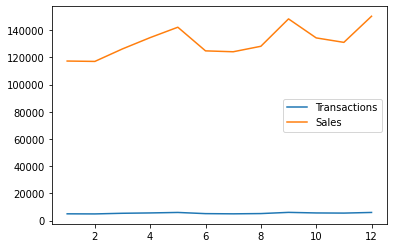

In [32]:
import matplotlib.pyplot as plt

# plot both variables' evolution over time

plt.plot(trs_sales_month['Month'],trs_sales_month['Transaction_ID'], label='Transactions')
plt.plot(trs_sales_month['Month'],trs_sales_month['Sales_Amount'], label='Sales')
plt.legend()

The plot looks better if both variables are **normalized** (why?), i.e., expressed as a ratio of the total, rather than absolute values.

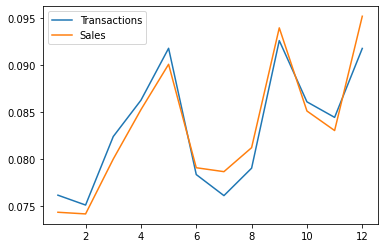

In [33]:
plt.plot(trs_sales_month['Month'],trs_sales_month['Transaction_ID']/trs_sales_month['Transaction_ID'].sum(), label='Transactions')
plt.plot(trs_sales_month['Month'],trs_sales_month['Sales_Amount']/trs_sales_month['Sales_Amount'].sum(), label='Sales')
plt.legend()

<ipython-input-34-f2bdda283bd6>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  trs_sale_fig.show()


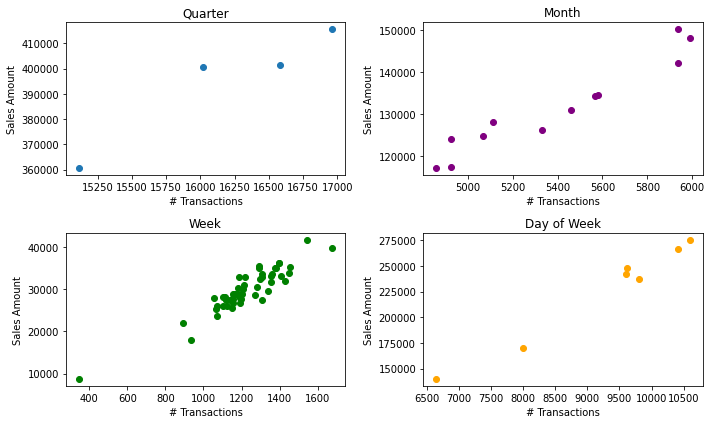

In [34]:
# plot the variables against each other

trs_sale_fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axs[0,0].scatter(x=trs_sales_quarter['Transaction_ID'], y=trs_sales_quarter['Sales_Amount'])
axs[0,0].set_xlabel('# Transactions') 
axs[0,0].set_ylabel('Sales Amount') 
axs[0,0].set_title("Quarter") 

axs[0,1].scatter(x=trs_sales_month['Transaction_ID'], y=trs_sales_month['Sales_Amount'], color='purple')
axs[0,1].set_xlabel('# Transactions')
axs[0,1].set_ylabel('Sales Amount')
axs[0,1].set_title("Month")

axs[1,0].scatter(x=trs_sales_week['Transaction_ID'], y=trs_sales_week['Sales_Amount'], color='green')
axs[1,0].set_xlabel('# Transactions') 
axs[1,0].set_ylabel('Sales Amount') 
axs[1,0].set_title("Week")

axs[1,1].scatter(x=trs_sales_weekday['Transaction_ID'], y=trs_sales_weekday['Sales_Amount'], color='orange')
axs[1,1].set_xlabel('# Transactions')
axs[1,1].set_ylabel('Sales Amount')
axs[1,1].set_title("Day of Week")

trs_sale_fig.tight_layout()
trs_sale_fig.show()

Often, you might want to include a **linear regression** in the plot, i.e., the line that better approximates your plot.

<ipython-input-35-7e037f9484ff>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  trs_sale_fig.show()


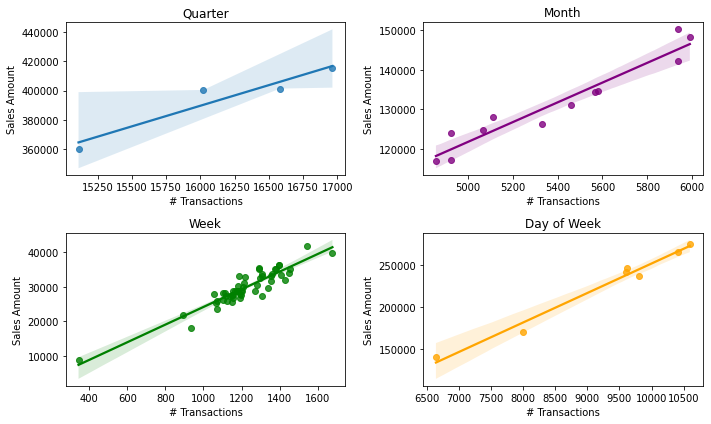

In [35]:
# seaborn is a nice plotting library, we will see it again in the following lectures
import seaborn as sns

# plot the variables against each other

trs_sale_fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

sns.regplot(x=trs_sales_quarter['Transaction_ID'], y=trs_sales_quarter['Sales_Amount'], ax=axs[0,0])
axs[0,0].set_xlabel('# Transactions') 
axs[0,0].set_ylabel('Sales Amount') 
axs[0,0].set_title("Quarter") 

sns.regplot(x=trs_sales_month['Transaction_ID'], y=trs_sales_month['Sales_Amount'], color='purple', ax=axs[0,1])
axs[0,1].set_xlabel('# Transactions')
axs[0,1].set_ylabel('Sales Amount')
axs[0,1].set_title("Month")

sns.regplot(x=trs_sales_week['Transaction_ID'], y=trs_sales_week['Sales_Amount'], color='green', ax=axs[1,0])
axs[1,0].set_xlabel('# Transactions') 
axs[1,0].set_ylabel('Sales Amount') 
axs[1,0].set_title("Week")

sns.regplot(x=trs_sales_weekday['Transaction_ID'], y=trs_sales_weekday['Sales_Amount'], color='orange', ax=axs[1,1])
axs[1,1].set_xlabel('# Transactions')
axs[1,1].set_ylabel('Sales Amount')
axs[1,1].set_title("Day of Week")

trs_sale_fig.tight_layout()
trs_sale_fig.show()

In [36]:
# measure correlation

rho_q = trs_sales_quarter['Transaction_ID'].corr(trs_sales_quarter['Sales_Amount'])
print(f'quarter correlation: {rho_q}')

rho_m = trs_sales_month['Transaction_ID'].corr(trs_sales_month['Sales_Amount'])
print(f'month correlation: {rho_m}')

rho_w = trs_sales_week['Transaction_ID'].corr(trs_sales_week['Sales_Amount'])
print(f'week correlation: {rho_w}')

rho_wd = trs_sales_weekday['Transaction_ID'].corr(trs_sales_weekday['Sales_Amount'])
print(f'weekday correlation: {rho_wd}')

quarter correlation: 0.9561335149271273
month correlation: 0.9594793025028272
week correlation: 0.9270222652222035
weekday correlation: 0.9887156546168997


---
---

# Characterizing statistical distributions: skewness, boxplots, quartiles, percentiles, outliers

## **Sales Amount Distribution**

* **Q1:** Which is the distribution of sales amounts?

* **Q2:** How much do custumers spend when they visit the store?


In [37]:
# We compute the amount of each transaction

sales_amount = df.groupby('Transaction_ID', as_index=False).agg({'Sales_Amount':'sum'})
sales_amount.head(3)

Transaction_ID  Sales_Amount
0               1          3.13
1               2          5.46
2               3          6.35

In [38]:
# Check the size of the dataframe

sales_amount.shape

(64682, 2)

In [39]:
sales_amount[['Sales_Amount']].describe()

Sales_Amount
count  64682.000000
mean      24.396874
std       38.613117
min        0.030000
25%        6.360000
50%       12.210000
75%       25.180000
max      707.730000

* **Q1:** How do we visualize the distribution?

<ipython-input-40-d513a5ab53eb>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


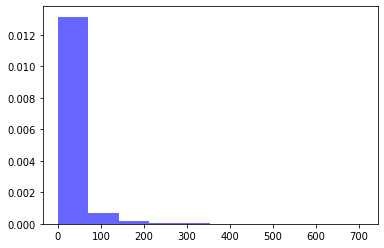

In [40]:
fig, ax = plt.subplots()

num_bins = 10
ax.hist(sales_amount['Sales_Amount'], num_bins, density=True, color='blue', alpha=0.6)

# ** NOTE **
#
# density: bool, default: False
#     If True, draw and return a probability density
#
# alpha: The parameter alpha is used to adjust the transparency of a graph plot.
#
# ** NOTE **

fig.show()

<ipython-input-41-ef5bfce7e479>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


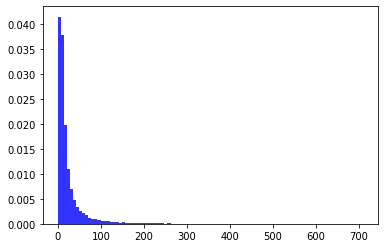

In [41]:
# plot again with more bins

fig, ax = plt.subplots()

num_bins = 100
ax.hist(sales_amount['Sales_Amount'], num_bins, density=True, color='blue', alpha=0.8)

fig.show()

* **Q1:** Wha do we observe from the plot?

 * The distribution has a long right tail.

 * Most of the values are concentrated in the 0-100 interval.

 * The distribution is positively skewed.

### Skewness

The skewness measures *how asymmetric* a statistical distribution is.

In [42]:
from scipy.stats import skew

print( f"skewness:\t{skew(sales_amount['Sales_Amount'])}" )
print( f"mode:\t{sales_amount['Sales_Amount'].mode()[0]}" )
print( f"median:\t{sales_amount['Sales_Amount'].median()}" )
print( f"mean:\t{sales_amount['Sales_Amount'].mean()}" )

skewness:	4.88033296345249
mode:	6.75
median:	12.21
mean:	24.396874246312727


* Right/Positive skewed distribution, with a long tail.

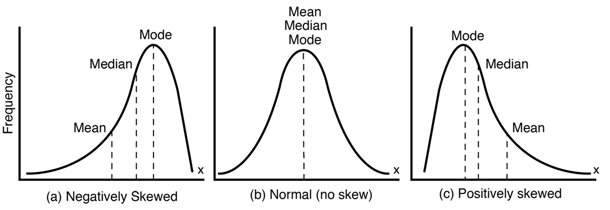

### Percentiles and quartiles ###

* saying that a value $x$ lies in the $m$th percentile means that $m\%$ of the values for that attribute fall at or below $x$
* quartiles are percentiles for $m=25,50,75$, which correspond to cutting the range of observed values into 4 equally likely intervals




  ![](Percentiles.png)(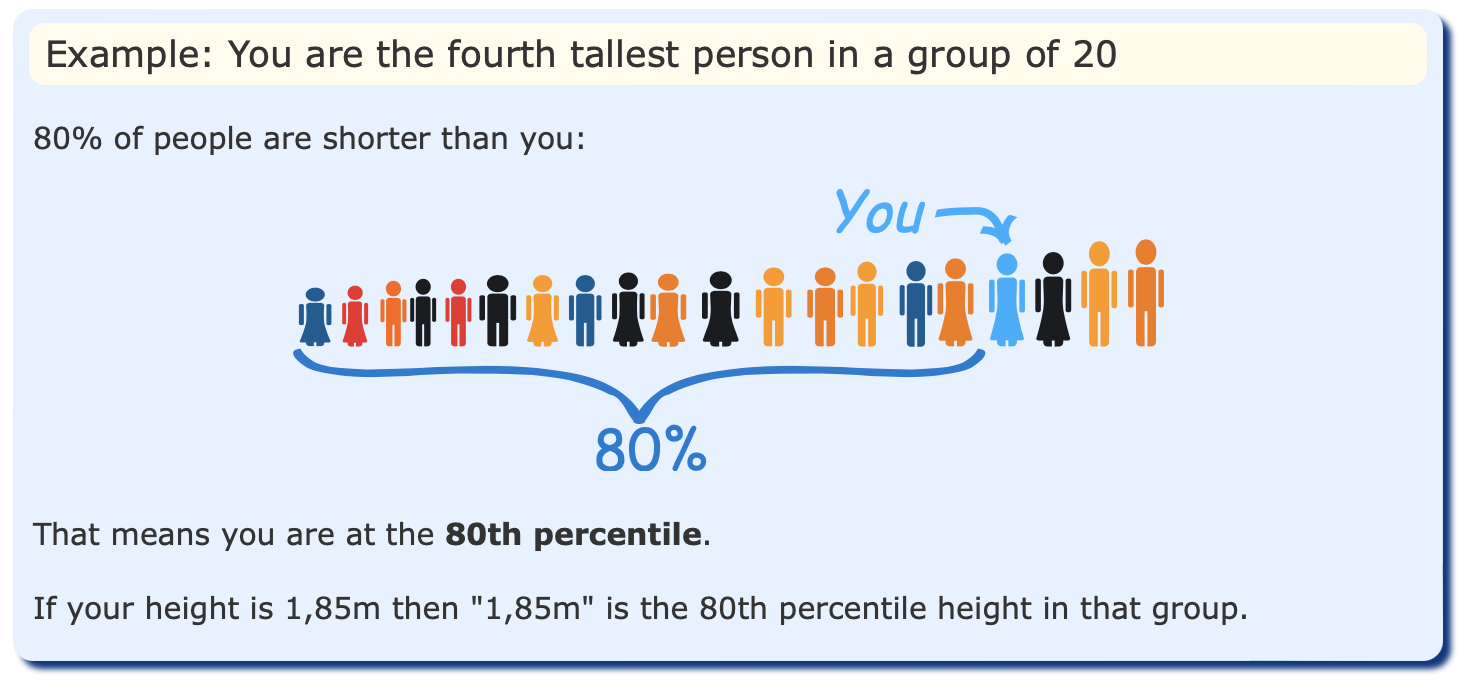)

<ipython-input-43-e21278e67ef2>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


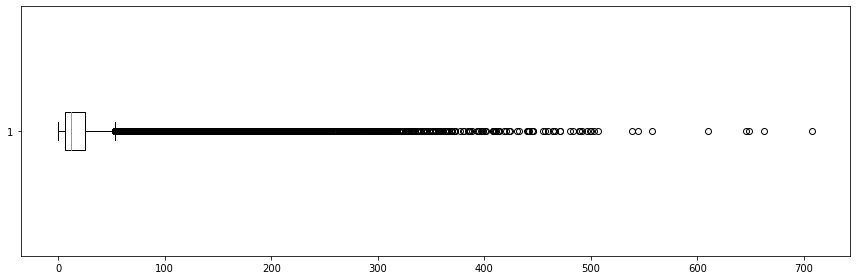

In [43]:
# Let's visualize it with another kind of plot

fig, ax = plt.subplots(figsize=(12, 4))
ax.boxplot(sales_amount['Sales_Amount'],  vert=False)

# ** NOTE **
#
# vert bool, default: True
#     If True, draws vertical boxes. If False, draw horizontal boxes.
#
# ** NOTE **

fig.tight_layout()
fig.show()

* The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. 

* The whiskers extend from the box by 1.5x the inter-quartile range (IQR). 
    * IQR = Q3 - Q1 

* Flier points (outliers) are those past the end of the whiskers.
    * An outlier is a point or set of data points that lie away from the rest of the data values of the dataset.

```
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```

![](Boxplot.png)

### **Excercise**

The shape of the distribution suggest that sales amounts follow a power law: the frequency of an event decreases as an inverse power of the "magnitude" of that event, i.e., the number of transactions of amount $x$ is roughly proportional to $x^{-a}$, for some $a$.

**Q:** How can we further investigate this relation?

* Try to plot the distribution in a log-log scale: if $y = x^{-a}$, then $\log y = -a \log x$ is a **line**

* Try to plot, in a log-log scale, the empirical CCDF of the data, rather than the empirical PDF

    



In [44]:
# The code goes here!

### **Exercise**

* **Q1:** What do you think is more important for the store, small or large transactions?

* **Q2:** Which transactions generate the most revenue?




In [45]:
# The code goes here!

### **Outliers**

An outlier is a point or set of data points that lie *away* from the rest of the data values of the dataset. 

**Q1:** How do we check if our data contain outliers?

**Q2:** How do we identify outliers?

**Q3:** How do we treat outliers? 

**Q4:** Why is important to look for outliers?
 

### **Q1:** How do we check if our data contain outliers?


<ipython-input-46-b4422245c9cc>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


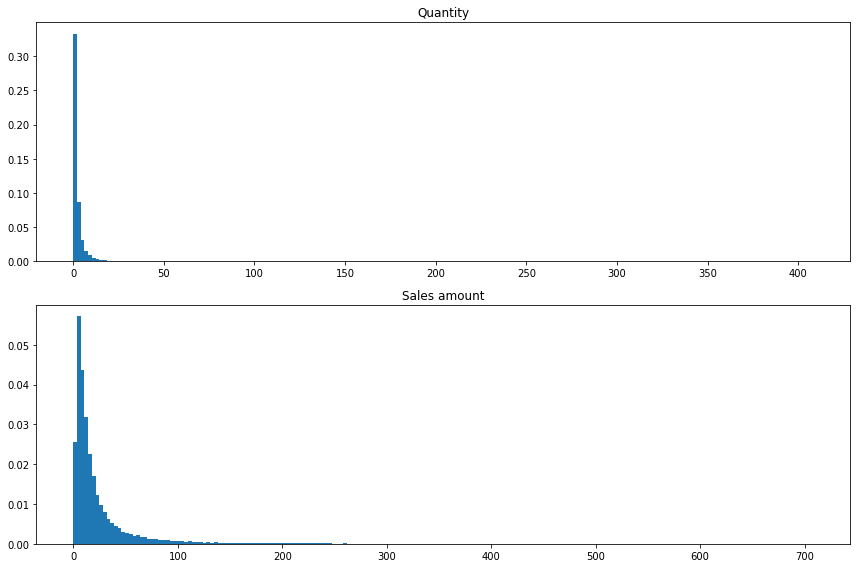

In [46]:
# we also consider the quantity of items per transaction

quantity = df.groupby('Transaction_ID', as_index=False).agg({'Quantity':'sum'})['Quantity']
sales = sales_amount['Sales_Amount']

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

nBins = 200
ax1.hist( quantity,   nBins,  density=True)
ax1.set_title('Quantity')
ax2.hist( sales, nBins,  density=True)
ax2.set_title('Sales amount')

fig.tight_layout()
fig.show()

<ipython-input-47-a04d7b576882>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


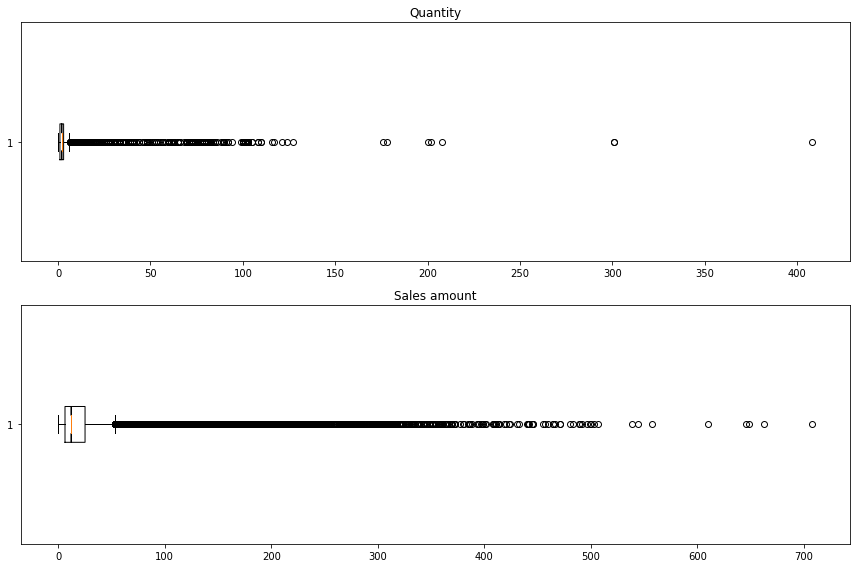

In [47]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

nBins = 200
ax1.boxplot( quantity, nBins, vert=False)
ax1.set_title('Quantity')
ax2.boxplot( sales, nBins, vert=False)
ax2.set_title('Sales amount')

fig.tight_layout()
fig.show()

We observe for all features that several data points, on the right side of the distribution, are marked as outliers.

* In the box plot all points greater than Q3+1.5*IQR are considered outliers.

### **Q2:** How do we identify outliers?

You can use a different methods to identify outliers based on the distribution of the data. Here we outline 3 main approaches


* **IQR** (Inter Quartile Range)
  
  * Data points falling below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

  * It can be applied to skewed distributions.

* **Percentile-based** approach

  * Data points above 99th-95th percentile and below 1st-5th percentile are considered outliers.

* **Z-score**
    * If the data are assumed to be roughly normally distributed, data points falling below $\mu-3\sigma$ or above $\mu+3\sigma$ are outliers.
    * The **standardized value** $z_i$ of a data point $x_i$ is $z_i = \frac{x_i - \mu(x)}{\sigma(x)}$
        * it measures distance from the mean $x_i$ in terms of *number of standard deviations* 
        * in terms of $z$, the outliers are the values below -3 or above +3

### **Q3:** How do we treat outliers? 

The two main approaches are *trimming* and *capping*:

* **Trimming**: We exclude outliers from our analysis, we remove them from our dataset. 

  * By applying this technique we reduce the size of our dataset.

* **Capping**: We cap our outliers data. We set a min and max value and outliers are modified to be inside the new range.

  * Outliers below the min take the min value, outliers above the max take the max value.



Since the distributions are clearly **non-Guassian**, we exclude the z-score.

* We use the **IQR**.
* We trim all values above Q3 + 1.5 IQR.

In [48]:
import numpy as np

trdata = {}
trdata['sales'] = sales.copy()
trdata['quantity'] = quantity.copy()

for k,v in trdata.items():
    Q1 = v.quantile(0.25)
    Q3 = v.quantile(0.75)
    IQR = Q3 - Q1
    upper = (Q3+1.5*IQR)
    trdata[k] = v[v<=upper]

We plot our new dataframe

<ipython-input-49-c120482de925>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


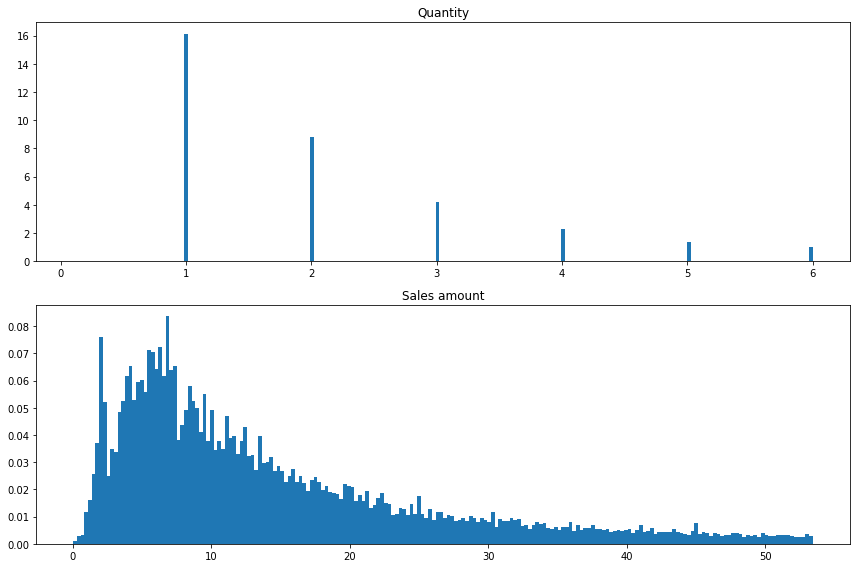

In [49]:
# we also consider the quantity of items per transaction

quantity = df.groupby('Transaction_ID', as_index=False).agg({'Quantity':'sum'})['Quantity']
sales = sales_amount['Sales_Amount']

fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

nBins = 200
ax1.hist( trdata['quantity'],   nBins,  density=True)
ax1.set_title('Quantity')
ax2.hist( trdata['sales'], nBins,  density=True)
ax2.set_title('Sales amount')

fig.tight_layout()
fig.show()

<ipython-input-50-538c52863957>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


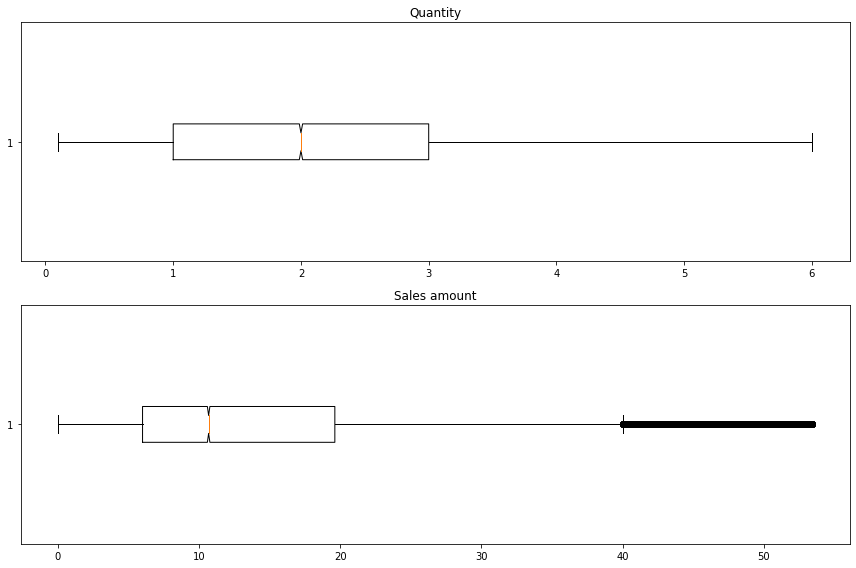

In [50]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

nBins = 200
ax1.boxplot( trdata['quantity'], nBins, vert=False)
ax1.set_title('Quantity')
ax2.boxplot( trdata['sales'], nBins, vert=False)
ax2.set_title('Sales amount')

fig.tight_layout()
fig.show()

---
---

# Measuring similarity of multidimensional and nonnumeric data

Let us start with a toy example:

Imagine that you have a data set consisting of the *heights* and *weights* of hundreds of people, and that you are trying to identify **groups of people** having **similar** body sizes.

* You could *separately* measure how *similar* their height and weight are, but how do you *combine* the results?
* It sounds more reasonable to treat (height, weight) pairs as **points** in two-dimensions and estimate similarity based on Euclidean distance.

In [51]:
#  Consider the following toy dataframe
import pandas as pd

df = pd.DataFrame( {'Person':['A','B','C'], 'Height (inches)':[63,67,70], 
      'Height (centimeters)':[160,170.2,177.8], 'Weight (pounds)':[150,160,171] })

df

Person  Height (inches)  Height (centimeters)  Weight (pounds)
0      A               63                 160.0              150
1      B               67                 170.2              160
2      C               70                 177.8              171

In [52]:
import math 

def distance (v, w):
       return math.sqrt( sum([ (v_i-w_i)**2 for v_i, w_i in zip(v,w) ]) )

# inches
Ai = [ df['Height (inches)'][0], df['Weight (pounds)'][0] ]
Bi = [ df['Height (inches)'][1], df['Weight (pounds)'][1] ] 
Ci = [ df['Height (inches)'][2], df['Weight (pounds)'][2] ]

# centimeters
Ac = [ df['Height (centimeters)'][0], df['Weight (pounds)'][0] ]
Bc = [ df['Height (centimeters)'][1], df['Weight (pounds)'][1] ] 
Cc = [ df['Height (centimeters)'][2], df['Weight (pounds)'][2] ]

print(f"AB: {distance(Ai,Bi):.2f} [using in]; {distance(Ac,Bc):.2f} [using cm]")
print(f"AC: {distance(Ai,Ci):.2f} [using in]; {distance(Ac,Cc):.2f} [using cm]")
print(f"BC: {distance(Bi,Ci):.2f} [using in]; {distance(Bc,Cc):.2f} [using cm]")


AB: 10.77 [using in]; 14.28 [using cm]
AC: 22.14 [using in]; 27.53 [using cm]
BC: 11.40 [using in]; 13.37 [using cm]


**Problem:** 
* if we use inches, B is more similar to A
* if we use centimeters, B is more similar to C

## Rescaling

Many techniques are sensitive to the ***scale*** of your data (*data range*).

We need to obtain a measure that does **not** depend on the unit measure.

### **Standardizing**

A possibility to make different dimensions comparable with one another, is to rescale them in such a way that we consider the **relative** value, rather than the **absolute** value.

We can (again) use **standardization**: we rescale our data so that each dimension has **mean 0** and **standard deviation 1**. 

   * This effectively gets rid of the units, converting each dimension to “standard deviations from the mean.”
   * Two height/weights will be similar if they are *equally likely* (under the assumption that the data are normally distributed)

We recall that

$$z_i = \frac{x_i - \mu(x)}{\sigma(x)}$$

Where,

$z_i$: ith standardized value,

$x$: all values,

$\mu(x)$: the mean value of all x values

$\sigma(x)$: the standard deviation of the x values

In [53]:
# Calculate the standard deviation of the two columns

df[['Height (inches)', 'Height (centimeters)']].std()

Height (inches)         3.511885
Height (centimeters)    8.931592
dtype: float64

In [54]:
# Calculate the means of the two columns.

df[['Height (inches)', 'Height (centimeters)']].mean()

Height (inches)          66.666667
Height (centimeters)    169.333333
dtype: float64

In [55]:
df['z_inches'] = ( df['Height (inches)'] - df['Height (inches)'].mean()) / df['Height (inches)'].std()
df['z_cm'] = ( df['Height (centimeters)'] - df['Height (centimeters)'].mean()) / df['Height (centimeters)'].std()

df.head()

Person  Height (inches)  Height (centimeters)  Weight (pounds)  z_inches  \
0      A               63                 160.0              150 -1.044074   
1      B               67                 170.2              160  0.094916   
2      C               70                 177.8              171  0.949158   

       z_cm  
0 -1.044980  
1  0.097034  
2  0.947946

* **Q1:** Does the scale of the data affect the results?

* **Q2:** What is now the closest pair of points?

In [56]:
# inches
Ai = [ df['z_inches'][0], df['Weight (pounds)'][0] ]
Bi = [ df['z_inches'][1], df['Weight (pounds)'][1] ] 
Ci = [ df['z_inches'][2], df['Weight (pounds)'][2] ]

# centimeters
Ac = [ df['z_cm'][0], df['Weight (pounds)'][0] ]
Bc = [ df['z_cm'][1], df['Weight (pounds)'][1] ] 
Cc = [ df['z_cm'][2], df['Weight (pounds)'][2] ]

print(f"AB: {distance(Ai,Bi):.2f} - {distance(Ac,Bc):.2f}")
print(f"AC: {distance(Ai,Ci):.2f} - {distance(Ac,Cc):.2f}")
print(f"BC: {distance(Bi,Ci):.2f} - {distance(Bc,Cc):.2f}")

AB: 10.06 - 10.06
AC: 21.09 - 21.09
BC: 11.03 - 11.03


So far so good, but we only solved the issue of having to choose between two scales for the height.

We have to **standardized all features**, i.e., apply the same procedure to the **Weight** column.


### **Exercise**

* **Q1:** How do you standardize the 'Weight (pounds)' column?

* **Q2:** What is now the closest pair of points?

In [57]:
df['z_pounds'] = ( df['Weight (pounds)'] - df['Weight (pounds)'].mean()) / df['Weight (pounds)'].std()

In [58]:
df

Person  Height (inches)  Height (centimeters)  Weight (pounds)  z_inches  \
0      A               63                 160.0              150 -1.044074   
1      B               67                 170.2              160  0.094916   
2      C               70                 177.8              171  0.949158   

       z_cm  z_pounds  
0 -1.044980 -0.983755  
1  0.097034 -0.031734  
2  0.947946  1.015489

In [59]:
# centimeters
A_z = [ df['z_inches'][0], df['z_pounds'][0] ]
B_z = [ df['z_inches'][1], df['z_pounds'][1] ] 
C_z = [ df['z_inches'][2], df['z_pounds'][2] ]

print("AB standardized:", distance(A_z,B_z))
print(f"AC standardized: {distance(A_z,C_z):.2f}")
print(f"BC standardized: {distance(B_z,C_z):.2f}")

AB standardized: 1.4844668093876099
AC standardized: 2.82
BC standardized: 1.35


## Embedding of nonnumeric data and cosine similarity

The general idea of measuring similarity based on the distance on some *metric space* can be applied more generally even to **nonnumeric data**.

Consider the following example:
* we are given a data set containing users interests
* we want to find users that are *similar* according to their interests

In [60]:
users_interests = [
        ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
        ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
        ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
        ["R", "Python", "statistics", "regression", "probability"],
        ["machine learning", "regression", "decision trees", "libsvm"],
        ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
        ["statistics", "probability", "mathematics", "theory"],
        ["machine learning", "scikit-learn", "Mahout", "neural networks"],
        ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
        ["Hadoop", "Java", "MapReduce", "Big Data"],
        ["statistics", "R", "statsmodels"],
        ["C++", "deep learning", "artificial intelligence", "probability"],
        ["pandas", "R", "Python"],
        ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
        ["libsvm", "regression", "support vector machines"]
]

# The interestes of user 0 are

users_interests[0]

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

### Representing users as *one-hot vectors*

We represent users with vectors of 0s and 1s:
* the length of the vector is the number of possible interests
* the $i$th element of the vector is 1 if the user is interested in the $i$th item, 0 otherwise

To this end, we transform the dataset as follows:

In [61]:
# get all possible interests
my_columns = set.union(*[set(interests) for interests in users_interests])

# build dictionary of columns
d = {c:[] for c in my_columns}
for user in users_interests:
    for c in my_columns:
        if c in user:
            d[c].append(1)
        else:
            d[c].append(0)

# transform in a dataframe
users_df = pd.DataFrame(d)

users_df.head()

HBase  NoSQL  probability  libsvm  statistics  programming languages  \
0      1      0            0       0           0                      0   
1      1      1            0       0           0                      0   
2      0      0            0       0           0                      0   
3      0      0            1       0           1                      0   
4      0      0            0       1           0                      0   

   statsmodels  Python  MapReduce  Storm  ...  machine learning  Cassandra  \
0            0       0          0      1  ...                 0          1   
1            0       0          0      0  ...                 0          1   
2            1       1          0      0  ...                 0          0   
3            0       1          0      0  ...                 0          0   
4            0       0          0      0  ...                 1          0   

   MongoDB  decision trees  C++  databases  Postgres  Spark  regression  scipy  
0        0               0    0          0         0      1           0      0  
1        1               0    0          0         1      0           0      0  
2        0               0    0          0         0      0           0      1  
3        0               0    0          0         0      0           1      0  
4        0               1    0          0         0      0           1      0  

[5 rows x 36 columns]

### Measuring "angular" similarity 

We will use a metric called ***cosine similarity***, defined as the cosine of the angle between users' interest vectors.

Formally:

$cosine\_similarity$ ($A,B$) = $\cos(\theta) = \frac{A \cdot B}{\| A \| \| B \|}$

where: 

$A \cdot B$ is the dot product

$\| A \|$ is the Euclidean norm or magnitude of $A$




![](cosine-similarity-vectors.original.jpg)

With respect to Euclidean distance:
* the magnitude of the vectors is irrelevant (i.e., we do not have to normalize the vectors)
* it naturally provides a bounded similarity score between -1 and +1
* in general, it allows to consider:
    * *unrelated* orthogonal vectors having 0 similarity (e.g., users with no common interests)
    * *opposite* vectors having negative similarity (e.g., when a user *dislikes* what another user likes)

In [62]:
# We can compute the cosine similarity between two vectors as follows:

import math

def dot(a, b):
    return sum(a_i * b_i for a_i, b_i in zip(a, b))

def cosine_similarity(a, b):
    return dot(a, b) / math.sqrt(dot(a, a) * dot(b, b))

### Measuring pairwise similarities

We turn the dataframe into a numpy array and we compute the similarity matrix, whose $(i,j)$ element is the similarity between users $i$ and $j$.

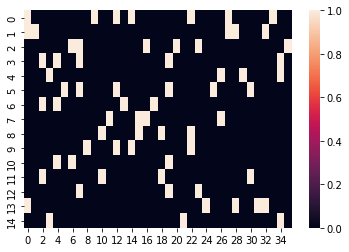

In [63]:
users_array = users_df.to_numpy()

import seaborn as sns

sns.heatmap(users_array)

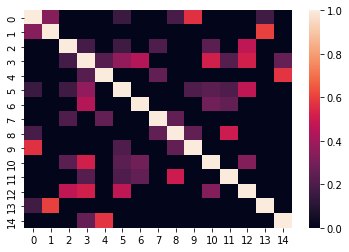

In [64]:
from sklearn.metrics import pairwise_distances

sim_mat = pairwise_distances(users_array, metric=cosine_similarity)

sns.heatmap(sim_mat)

Now, we can easily check who user 0 is most similar to: 

In [65]:
sim_mat[0].argsort()[::-1]

array([ 0,  9,  1,  8, 13,  5, 14, 12, 11, 10,  7,  6,  4,  3,  2])